## Lending Club dataset

### Converting data types, binarizing, one-hot encoding, features

In [2]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
df = pd.read_csv('./Data/LCdataset_cleaned80_254794.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0
1,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0
2,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0
3,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,3 years,MORTGAGE,87000.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0
4,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,8 years,RENT,75000.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,36 months,17.74%,540.34,C,C5,Special Education Teacher,1 year,RENT,62000.0,...,0.0,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0
254790,6000.0,36 months,11.02%,196.49,B,B2,Assistant Foreman,10+ years,MORTGAGE,80000.0,...,0.0,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0
254791,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0
254792,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0


In [4]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 80, dtype: int64

## Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254794 entries, 0 to 254793
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   254794 non-null  float64
 1   term                        254794 non-null  object 
 2   int_rate                    254794 non-null  object 
 3   installment                 254794 non-null  float64
 4   grade                       254794 non-null  object 
 5   sub_grade                   254794 non-null  object 
 6   emp_title                   254794 non-null  object 
 7   emp_length                  254794 non-null  object 
 8   home_ownership              254794 non-null  object 
 9   annual_inc                  254794 non-null  float64
 10  verification_status         254794 non-null  object 
 11  issue_d                     254794 non-null  object 
 12  loan_status                 254794 non-null  object 
 13  purpose       

The above **df.info()** shows a number of columns that are still an object. Some of these elements would have to get binarized (i.e. application_type, empl_length), some would have to be converted to a numeric data type (i.e. int_rate and revol_util). 

From Data Dictionary: <br>
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. <br>
int_rate: Interest Rate on the loan

#### Convert to float: int_rate and revol_util

In [6]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [7]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [8]:
df['initial_list_status'].value_counts(dropna=False)

w    237729
f     17065
Name: initial_list_status, dtype: int64

#### Column: Application Type

In [9]:
df['application_type'].value_counts(dropna=False) 

Individual    224549
Joint App      30245
Name: application_type, dtype: int64

In [10]:
df['application_type'] = np.where(df['application_type'] == 'Individual', 1, 0)

In [11]:
df['application_type'].value_counts(dropna=False) 

1    224549
0     30245
Name: application_type, dtype: int64

#### Column: emp_length

In [12]:
df['emp_length'].value_counts(dropna=False) 

10+ years    86914
2 years      26235
3 years      23284
< 1 year     21854
1 year       20448
5 years      19119
4 years      17637
6 years      12738
7 years      10319
8 years       9097
9 years       7149
Name: emp_length, dtype: int64

In [13]:
def emp_length_classification(string):
    if "10+ years" in string:
        return 10
    elif "9 years" in string:
        return 9
    elif "8 years" in string:
        return 8
    elif "7 years" in string:
        return 7
    elif "6 years" in string:
        return 6
    elif "5 years" in string:
        return 5
    elif "4 years" in string:
        return 4
    elif "3 years" in string:
        return 3
    elif "2 years" in string:
        return 2
    elif "1 year" in string:
        return 1
    elif "< 1 year" in string:
        return 0

In [14]:
df['emp_length'] = df['emp_length'].map(emp_length_classification)

In [15]:
df['emp_length'].value_counts(dropna=False) 

10    86914
1     42302
2     26235
3     23284
5     19119
4     17637
6     12738
7     10319
8      9097
9      7149
Name: emp_length, dtype: int64

In [16]:
#test
def length(string):
    if '8 years' in string:
        return 8

In [17]:
length('Hello 8 years')

8

#### Column: term

In [18]:
df['term'].value_counts(dropna=False) 

 36 months    168003
 60 months     86791
Name: term, dtype: int64

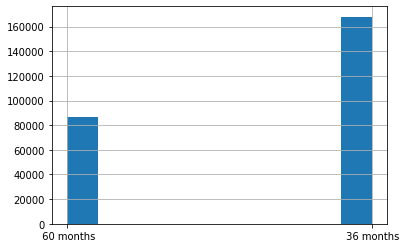

In [19]:
df['term'].hist();

#### More columns to convert: grade, subgrade

In [20]:
df['grade'].value_counts(dropna=False)

A    78850
B    74740
C    59542
D    41662
Name: grade, dtype: int64

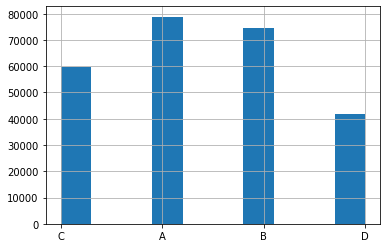

In [21]:
df['grade'].hist();

In [22]:
## Loan Amount by grade - grades C, B, and A are the most common
df.groupby(by='grade')['loan_amnt'].mean().sort_values(ascending=False)

grade
B    17453.822585
A    16581.908687
C    16019.888482
D    15416.210816
Name: loan_amnt, dtype: float64

In [23]:
df['sub_grade'].value_counts(dropna=False) #dropping to avoid multi collinearity

A4    22644
A5    18907
B4    17395
B5    16891
D2    15971
A1    15221
B2    14788
B1    13989
C5    13931
C1    12380
C2    11899
A3    11762
B3    11677
C3    11552
A2    10316
C4     9780
D3     8828
D1     8027
D4     4921
D5     3915
Name: sub_grade, dtype: int64

In [24]:
df.drop(columns='sub_grade', inplace=True)

#### Dropping non informative column

In [25]:
#dropping - this column is not informative
df.drop(columns= 'initial_list_status', axis=1, inplace=True)

In [26]:
df.shape

(254794, 78)

#### Column: home_ownership

In [27]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    128214
RENT         99534
OWN          27044
ANY              2
Name: home_ownership, dtype: int64

In [28]:
df[df['home_ownership'] == 'ANY']

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
21141,15000.0,60 months,23.05,423.29,D,Heat Collision,3,ANY,60000.0,Source Verified,...,0.0,4.0,100.0,33.3,0.0,0.0,32552.0,19482.0,6500.0,16052.0
227679,5000.0,36 months,18.62,182.33,D,Do It Outdoors,3,ANY,36000.0,Not Verified,...,0.0,2.0,100.0,66.7,0.0,0.0,40061.0,37439.0,5900.0,33161.0


In [29]:
df.drop(df[df['home_ownership'] == 'ANY'].index, inplace=True)

In [30]:
df.shape

(254792, 78)

In [31]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    128214
RENT         99534
OWN          27044
Name: home_ownership, dtype: int64

#### The column emp_title

The emp_title column is not standardized and does not seem to provide sufficient value. If the values were categorized / grouped by industry and position level, that could be helpful. We will likely drop this column due to a wide range of diverse values within it, categorizing which appears to be rather subjective. The initial dataframe included 103,906 unique values within the emp_title column. 

df['emp_title'].nunique() 
103906

df['emp_title'].value_counts(dropna=False)

NaN                                54699
Teacher                             6200
Manager                             5374
Driver                              2881
Registered Nurse                    2715
                                   ...  
Manager trainer                        1
VP Food and Beverage                   1
Building Maintenance Supervisor        1
Lead Medical Tech                      1
Style Attendant                        1
Name: emp_title, Length: 103907, dtype: int64

In [32]:
df['emp_title'].value_counts(dropna=False)

Teacher                        4955
Manager                        4249
Driver                         2344
Registered Nurse               2245
RN                             1744
                               ... 
Pharma Lead                       1
Cerk                              1
Concierge Travel Consultant       1
Facilities Planner                1
Principal gas mapping tech        1
Name: emp_title, Length: 85767, dtype: int64

In [33]:
df['emp_title'].nunique() 

85767

In [34]:
df.drop(columns= 'emp_title', axis=1, inplace=True)

In [35]:
df.shape

(254792, 77)

#### Re-categorizing the Purpose column

Purpose is another variable, where one of 12 categories - debt_consolidation - takes up 59% of all transactions; to produce better modeling results this variable was re-categorized into 4 subgroups (instead of initial 12 subgroups), which preserves the information while reducing the skewness of the data .

#df['purpose'].value_counts(dropna=False)<br>
debt_consolidation    139921
credit_card            69395
home_improvement       14959
other                  14062
major_purchase          4493
medical                 2816
car                     2028
house                   1973
vacation                1937
small_business          1640
moving                  1447
renewable_energy         123
Name: purpose, dtype: int64

In [36]:
df['purpose'].value_counts(dropna=False)

debt_consolidation    139919
credit_card            69395
home_improvement       14959
other                  14062
major_purchase          4493
medical                 2816
car                     2028
house                   1973
vacation                1937
small_business          1640
moving                  1447
renewable_energy         123
Name: purpose, dtype: int64

In [37]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.549150
credit_card           0.272359
home_improvement      0.058711
other                 0.055190
major_purchase        0.017634
medical               0.011052
car                   0.007959
house                 0.007744
vacation              0.007602
small_business        0.006437
moving                0.005679
renewable_energy      0.000483
Name: purpose, dtype: float64

In [38]:
def purpose_category(string):
    if "debt_consolidation" in string:
        return 'debt_consolidation'
    elif "credit_card" in string:
        return 'credit_card'
    elif "home_improvement" in string:
        return 'home_improvement'
    else:
        return 'other'
    
df['purpose'] = df['purpose'].map(purpose_category) 

In [39]:
df['purpose'].value_counts()

debt_consolidation    139919
credit_card            69395
other                  30519
home_improvement       14959
Name: purpose, dtype: int64

#### Column verification status

In [44]:
# verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified. 
# Using get dummies to binarize this column.
df['verification_status'].value_counts(dropna=False)

Source Verified    113493
Not Verified       110802
Verified            30497
Name: verification_status, dtype: int64

### One hot encoding with Pandas pd.get_dummies()

In [40]:
pd.get_dummies(df[['term', 'purpose', 'addr_state', 'grade', 'home_ownership','verification_status']], drop_first=True).head()

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,addr_state_WI,addr_state_WV,addr_state_WY,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [41]:
df_dummies = pd.get_dummies(df[['term', 'purpose', 'addr_state', 'grade', 'home_ownership', 'verification_status']], drop_first=True) 

In [42]:
# df = pd.concat([df,pd.get_dummies(df['purpose'], prefix='purpose', drop_first = True)],axis=1)
# df

In [43]:
df.shape

(254792, 77)

### Feature engineering a new column to calculate the age of the oldest credit line - columns issue_d and earliest_cr_line

The month which the loan was funded is not a factor in approving a loan application. However, this data field could be helpful in calculating the age of the earliest/oldest credit line - since both columns are dates. The issue_d is a close approximation of the time when an investor reviewed the loan application.

earliest_cr_line: The date the borrower's earliest reported credit line was opened

issue_d: The month which the loan was funded

In [45]:
#issue_d: The month which the loan was funded
df['issue_d'].value_counts(dropna=False)

Jul-2019    33912
Aug-2019    31881
Oct-2019    30670
Sep-2019    30242
Jan-2020    29036
Dec-2019    28780
Nov-2019    26937
Feb-2020    24241
Mar-2020    19093
Name: issue_d, dtype: int64

In [46]:
#earliest_cr_line: The date the borrower's earliest reported credit line was opened
df['earliest_cr_line'].value_counts(dropna=False)

Aug-2006    2429
Aug-2005    2207
Sep-2005    2199
Aug-2007    2158
Sep-2006    2145
            ... 
Jul-1960       1
Jul-1964       1
May-1960       1
Aug-1966       1
Jan-1944       1
Name: earliest_cr_line, Length: 649, dtype: int64

In [47]:
#Since both fields are objects/strings, they would have to be converted to datetime format, in order for me to calculate the age of the oldest credit line.
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [48]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [49]:
df['age_oldest_line'] = df['issue_d'] - df['earliest_cr_line'] 

In [50]:
df['age_oldest_line'].value_counts()

4748 days     1706
5113 days     1675
4901 days     1515
4383 days     1496
5478 days     1424
              ... 
18962 days       1
16618 days       1
19387 days       1
17289 days       1
18323 days       1
Name: age_oldest_line, Length: 1818, dtype: int64

In [51]:
#changing the format to numeric (to remove the word 'days' appearing in the column)
df['age_oldest_line'] = df['age_oldest_line'].dt.days

In [52]:
4748/365

13.008219178082191

In [53]:
#updating the age of oldest line columns from days to years (365 days )
df['age_oldest_line'] = round(df['age_oldest_line']/365)

In [54]:
df['age_oldest_line'].value_counts()

13.0    20801
14.0    20437
15.0    17713
12.0    17363
16.0    14917
        ...  
59.0        4
63.0        2
70.0        2
61.0        2
76.0        1
Name: age_oldest_line, Length: 62, dtype: int64

In [55]:
#drop the other two columns
df.drop(columns = ['earliest_cr_line', 'issue_d'], axis=1, inplace=True)
df.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,33000.0,60 months,15.24,789.24,C,10,MORTGAGE,84000.0,Source Verified,Current,...,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,31.0
1,19000.0,36 months,6.46,581.99,A,10,MORTGAGE,83000.0,Verified,Current,...,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,23.0
2,15000.0,36 months,7.02,463.30,A,5,MORTGAGE,129000.0,Source Verified,Current,...,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,13.0


In [56]:
df.shape

(254792, 76)

In [57]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_t

In [58]:
df['addr_state'].nunique()

50

In [59]:
df['addr_state'].value_counts(dropna=False) #50 states

CA    33589
TX    22488
FL    18384
NY    18337
IL    10468
NJ     9512
OH     8672
GA     8494
PA     8491
VA     6905
NC     6748
MI     6688
MA     6310
AZ     6204
MD     6101
WA     5451
IN     4532
MN     4426
TN     4337
CT     4313
MO     4235
CO     3949
NV     3668
WI     3594
SC     3182
OR     3093
AL     2886
LA     2616
KY     2579
OK     2463
KS     2147
AR     2035
UT     1763
MS     1655
WV     1498
NH     1378
NE     1343
RI     1260
NM     1259
HI     1072
ID      952
ME      901
DE      774
MT      723
VT      651
ND      582
AK      539
WY      535
SD      506
DC      504
Name: addr_state, dtype: int64

In [60]:
# Checking the max number of columns supported by this number of rows
import math

math.sqrt(254794)

504.77123531358245

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,254792.0,16515.779832,10193.516489,1000.00,8593.75,15000.00,23250.00,40000.00
int_rate,254792.0,13.210855,5.171244,6.00,8.81,12.40,16.95,30.99
installment,254792.0,476.804494,286.262432,30.64,264.13,404.05,642.30,1671.88
emp_length,254792.0,5.830948,3.582960,1.00,2.00,5.00,10.00,10.00
annual_inc,254792.0,91208.824620,105625.558492,14.00,54080.00,75000.00,107000.00,9999999.00
...,...,...,...,...,...,...,...,...
tot_hi_cred_lim,254792.0,214299.190300,197328.232254,1945.00,69289.75,148092.50,308180.00,5070345.00
total_bal_ex_mort,254792.0,65204.471714,59078.889417,52.00,28857.00,48854.50,81682.25,2385357.00
total_bc_limit,254792.0,30782.662007,27813.393198,100.00,12000.00,22900.00,40500.00,788200.00
total_il_high_credit_limit,254792.0,59322.756295,52272.447585,49.00,25171.00,45712.50,76783.00,2030436.00


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254792 entries, 0 to 254793
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   254792 non-null  float64
 1   term                        254792 non-null  object 
 2   int_rate                    254792 non-null  float64
 3   installment                 254792 non-null  float64
 4   grade                       254792 non-null  object 
 5   emp_length                  254792 non-null  int64  
 6   home_ownership              254792 non-null  object 
 7   annual_inc                  254792 non-null  float64
 8   verification_status         254792 non-null  object 
 9   loan_status                 254792 non-null  object 
 10  purpose                     254792 non-null  object 
 11  addr_state                  254792 non-null  object 
 12  dti                         254792 non-null  float64
 13  delinq_2yrs   

### Defining the Target variable for modeling

The target variable is based on the Loan Status variable. 

Good loans = Current + Fully Paid + In Grace Period + Issues
Bad loans = Charged off + Default + Late (16-30 days) + Late (31-120 days)

Good loans/Current status = 1
Bad loans/Defaulting and Lates = 0

In [82]:
#Huge class imbalance
df['loan_status'].value_counts(dropna=False)

Current               230570
Fully Paid             17935
Late (31-120 days)      2006
Charged Off             1951
In Grace Period         1546
Late (16-30 days)        397
Issued                   365
Default                   22
Name: loan_status, dtype: int64

In [83]:
#Huge class imbalance
df['loan_status'].value_counts(normalize=True)

Current               0.904934
Fully Paid            0.070391
Late (31-120 days)    0.007873
Charged Off           0.007657
In Grace Period       0.006068
Late (16-30 days)     0.001558
Issued                0.001433
Default               0.000086
Name: loan_status, dtype: float64

In [84]:
2006 + 1951 + 397 + 22

4376

In [85]:
# will create a new columns df['loan_status_lr']

def loan_status_classification(string):
    if "Current" in string:
        return 1 
    elif "Fully Paid" in string:
        return 1
    elif "Late" in string:
        return 0
    elif "Charged Off" in string:
        return 0
    elif "In Grace Period" in string:
        return 1
    elif "Issued" in string:
        return 1
    elif "Default" in string:
        return 0
    
df['loan_status_log'] = df['loan_status'].map(loan_status_classification)    

In [87]:
df.shape

(254792, 77)

In [88]:
df['loan_status_log'].value_counts() #these values match 1 vs 0 I've calculated

1    250416
0      4376
Name: loan_status_log, dtype: int64

In [89]:
df['loan_status_log'].value_counts(normalize=True)  #class imbalance

1    0.982825
0    0.017175
Name: loan_status_log, dtype: float64

As such, our baseline is 0.982825. Note the class imbalance in the Current subgroup of Loan Status, which is reflective of the data structure and the desired Current/Fully Paid Off rate.

In [90]:
df.shape

(254792, 77)

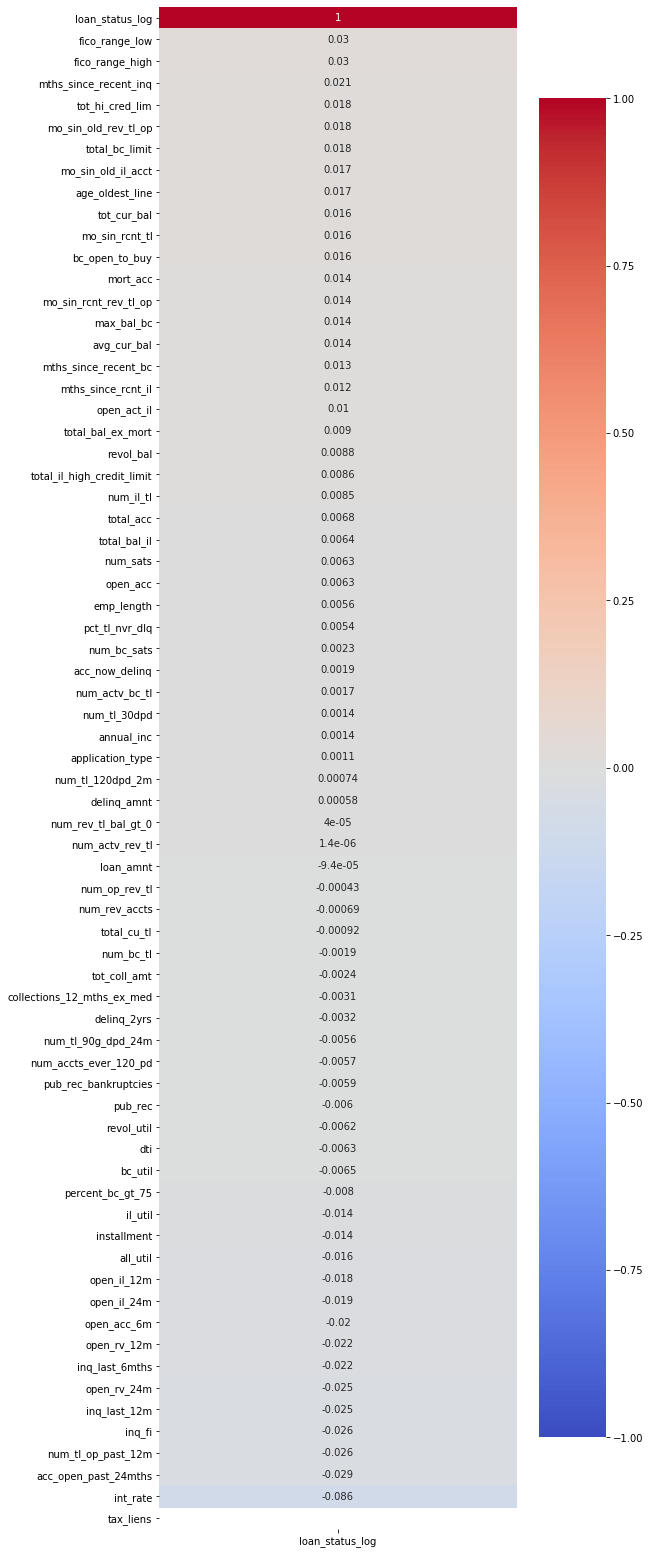

In [95]:
plt.figure(figsize=(8,28))

sns.heatmap(df.corr()[['loan_status_log']].sort_values('loan_status_log', ascending=False), 
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

In [92]:
df

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line,loan_status_log
0,33000.0,60 months,15.24,789.24,C,10,MORTGAGE,84000.0,Source Verified,Current,...,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,31.0,1
1,19000.0,36 months,6.46,581.99,A,10,MORTGAGE,83000.0,Verified,Current,...,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,23.0,1
2,15000.0,36 months,7.02,463.30,A,5,MORTGAGE,129000.0,Source Verified,Current,...,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,13.0,1
3,21325.0,60 months,13.08,486.09,B,3,MORTGAGE,87000.0,Verified,Current,...,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0,31.0,1
4,12000.0,60 months,17.74,303.03,C,8,RENT,75000.0,Verified,Current,...,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,36 months,17.74,540.34,C,1,RENT,62000.0,Source Verified,Current,...,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0,14.0,1
254790,6000.0,36 months,11.02,196.49,B,10,MORTGAGE,80000.0,Not Verified,Current,...,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0,13.0,1
254791,10525.0,36 months,7.56,327.69,A,10,OWN,40000.0,Source Verified,Current,...,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,33.0,1
254792,16000.0,36 months,11.71,529.22,B,10,RENT,80000.0,Source Verified,Current,...,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,25.0,1


In [93]:
df_dummies

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,addr_state_WI,addr_state_WV,addr_state_WY,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
254790,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
254791,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
254792,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0


## Logistic Regression

#### Set X and y variables

In [96]:
## Define X and y
X = df.drop(columns = ['loan_status', 'loan_status_log', 'term', 'purpose', 'addr_state', 'grade', 'home_ownership', 'verification_status', 'application_type'], axis=1)
y = df[['loan_status_log']]

In [97]:
X.shape

(254792, 68)

In [98]:
X

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,33000.0,15.24,789.24,10,84000.0,35.07,0.0,695.0,699.0,0.0,...,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,31.0
1,19000.0,6.46,581.99,10,83000.0,20.68,0.0,785.0,789.0,1.0,...,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,23.0
2,15000.0,7.02,463.30,5,129000.0,28.45,0.0,770.0,774.0,0.0,...,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,13.0
3,21325.0,13.08,486.09,3,87000.0,52.39,0.0,725.0,729.0,0.0,...,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0,31.0
4,12000.0,17.74,303.03,8,75000.0,32.96,0.0,685.0,689.0,1.0,...,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,17.74,540.34,1,62000.0,32.97,0.0,695.0,699.0,1.0,...,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0,14.0
254790,6000.0,11.02,196.49,10,80000.0,34.13,0.0,720.0,724.0,0.0,...,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0,13.0
254791,10525.0,7.56,327.69,10,40000.0,14.52,0.0,750.0,754.0,1.0,...,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,33.0
254792,16000.0,11.71,529.22,10,80000.0,7.29,0.0,715.0,719.0,3.0,...,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,25.0


In [99]:
y.drop(y.index[[21141, 227679]], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
y.shape

(254790, 1)

#### Scale numeric data with StandardScaler

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [103]:
X_sc

array([[ 1.6171311 ,  0.39239087,  1.09143249, ...,  3.34434277,
        -0.82576659,  2.07796917],
       [ 0.24370638, -1.30546305,  0.36744505, ...,  0.27387356,
        -0.46530831,  0.98794561],
       [-0.14870068, -1.19717169, -0.04717531, ..., -0.06409378,
         1.78733599, -0.37458383],
       ...,
       [-0.58770608, -1.09274787, -0.52090239, ...,  0.27746895,
        -0.8479198 ,  2.35047506],
       [-0.05059891, -0.29023149,  0.18310335, ..., -0.75441004,
        -0.97418159,  1.2604515 ],
       [ 0.34180815, -0.15680106,  0.6683234 , ...,  0.0869129 ,
        -0.56589687, -0.23833089]])

In [104]:
pd.DataFrame(X_sc)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1.617131,0.392391,1.091432,1.163580,-0.068249,1.005612,-0.305574,-0.320706,-0.320706,-0.716427,...,-0.180899,0.592946,-0.299111,-0.333185,0.0,0.694716,0.252604,3.344343,-0.825767,2.077969
1,0.243706,-1.305463,0.367445,1.163580,-0.077716,-0.074197,-0.305574,2.272749,2.272732,0.506612,...,-1.212483,0.592946,0.254429,-0.333185,0.0,-0.153375,-0.621940,0.273874,-0.465308,0.987946
2,-0.148701,-1.197172,-0.047175,-0.231917,0.357785,0.508855,-0.305574,1.840506,1.840492,-0.716427,...,1.366476,0.592946,-0.935979,-0.333185,0.0,0.963659,0.975994,-0.064094,1.787336,-0.374584
3,0.471793,-0.025304,0.032437,-0.790116,-0.039847,2.305284,-0.305574,0.543779,0.543773,-0.716427,...,-0.696691,0.592946,-0.510408,-0.333185,0.0,2.265113,2.441427,0.849137,0.713728,2.077969
4,-0.443006,0.875834,-0.607047,0.605381,-0.153456,0.847280,-0.305574,-0.608868,-0.608866,0.506612,...,-0.180899,0.334717,-0.123526,-0.333185,0.0,-0.141035,1.187610,0.550719,1.382112,0.987946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254787,-0.148701,0.875834,0.221949,-1.348315,-0.276532,0.848030,-0.305574,-0.320706,-0.320706,0.506612,...,0.334893,0.287766,0.552030,-0.333185,0.0,-0.273566,1.206720,0.072531,1.245290,-0.238331
254788,-1.031617,-0.423662,-0.979224,1.163580,-0.106119,0.935075,-0.305574,0.399698,0.399693,-0.716427,...,-0.696691,0.592946,0.055035,-0.333185,0.0,0.228948,0.360511,-0.606999,0.633131,-0.374584
254789,-0.587706,-1.092748,-0.520902,1.163580,-0.484816,-0.536436,-0.305574,1.264183,1.264173,0.506612,...,1.366476,0.358192,-0.935979,-0.333185,0.0,-0.726705,-0.955173,0.277469,-0.847920,2.350475
254790,-0.050599,-0.290231,0.183103,1.163580,-0.106119,-1.078966,-0.305574,0.255617,0.255613,2.952691,...,2.913852,-1.085543,-0.935979,-0.333185,0.0,-0.972996,-0.945271,-0.754410,-0.974182,1.260452


In [105]:
pd.DataFrame(X_sc, columns=X.columns) #turning X_sc into a dataframe

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,1.617131,0.392391,1.091432,1.163580,-0.068249,1.005612,-0.305574,-0.320706,-0.320706,-0.716427,...,-0.180899,0.592946,-0.299111,-0.333185,0.0,0.694716,0.252604,3.344343,-0.825767,2.077969
1,0.243706,-1.305463,0.367445,1.163580,-0.077716,-0.074197,-0.305574,2.272749,2.272732,0.506612,...,-1.212483,0.592946,0.254429,-0.333185,0.0,-0.153375,-0.621940,0.273874,-0.465308,0.987946
2,-0.148701,-1.197172,-0.047175,-0.231917,0.357785,0.508855,-0.305574,1.840506,1.840492,-0.716427,...,1.366476,0.592946,-0.935979,-0.333185,0.0,0.963659,0.975994,-0.064094,1.787336,-0.374584
3,0.471793,-0.025304,0.032437,-0.790116,-0.039847,2.305284,-0.305574,0.543779,0.543773,-0.716427,...,-0.696691,0.592946,-0.510408,-0.333185,0.0,2.265113,2.441427,0.849137,0.713728,2.077969
4,-0.443006,0.875834,-0.607047,0.605381,-0.153456,0.847280,-0.305574,-0.608868,-0.608866,0.506612,...,-0.180899,0.334717,-0.123526,-0.333185,0.0,-0.141035,1.187610,0.550719,1.382112,0.987946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254787,-0.148701,0.875834,0.221949,-1.348315,-0.276532,0.848030,-0.305574,-0.320706,-0.320706,0.506612,...,0.334893,0.287766,0.552030,-0.333185,0.0,-0.273566,1.206720,0.072531,1.245290,-0.238331
254788,-1.031617,-0.423662,-0.979224,1.163580,-0.106119,0.935075,-0.305574,0.399698,0.399693,-0.716427,...,-0.696691,0.592946,0.055035,-0.333185,0.0,0.228948,0.360511,-0.606999,0.633131,-0.374584
254789,-0.587706,-1.092748,-0.520902,1.163580,-0.484816,-0.536436,-0.305574,1.264183,1.264173,0.506612,...,1.366476,0.358192,-0.935979,-0.333185,0.0,-0.726705,-0.955173,0.277469,-0.847920,2.350475
254790,-0.050599,-0.290231,0.183103,1.163580,-0.106119,-1.078966,-0.305574,0.255617,0.255613,2.952691,...,2.913852,-1.085543,-0.935979,-0.333185,0.0,-0.972996,-0.945271,-0.754410,-0.974182,1.260452


In [106]:
df_dummies

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,addr_state_WI,addr_state_WV,addr_state_WY,grade_B,grade_C,grade_D,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
254790,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
254791,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
254792,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [107]:
df_sc = pd.DataFrame(X_sc, columns=X.columns)  #gave it a name

In [108]:
df_sc.isna().sum().sum()

0

In [109]:
df_dummies.isna().sum().sum()

0

In [110]:
pd.concat([df_dummies, df_sc], axis=1).dropna().isna().sum().sum()

0

#### Create a finalized dataframe of scaled numeric and binarized variables

In [111]:
df_final = pd.concat([df_dummies, df_sc], axis=1, join='inner')

In [112]:
df_final

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,1,0,0,0,0,0,0,0,0,0,...,-0.180899,0.592946,-0.299111,-0.333185,0.0,0.694716,0.252604,3.344343,-0.825767,2.077969
1,0,1,0,0,0,0,0,0,0,0,...,-1.212483,0.592946,0.254429,-0.333185,0.0,-0.153375,-0.621940,0.273874,-0.465308,0.987946
2,0,0,0,0,0,0,0,0,0,0,...,1.366476,0.592946,-0.935979,-0.333185,0.0,0.963659,0.975994,-0.064094,1.787336,-0.374584
3,1,0,1,0,0,0,0,0,0,0,...,-0.696691,0.592946,-0.510408,-0.333185,0.0,2.265113,2.441427,0.849137,0.713728,2.077969
4,1,0,0,0,0,0,0,0,0,0,...,-0.180899,0.334717,-0.123526,-0.333185,0.0,-0.141035,1.187610,0.550719,1.382112,0.987946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254787,0,1,0,0,0,0,0,1,0,0,...,0.334893,0.287766,0.552030,-0.333185,0.0,-0.273566,1.206720,0.072531,1.245290,-0.238331
254788,1,1,0,0,0,0,0,0,0,0,...,-0.696691,0.592946,0.055035,-0.333185,0.0,0.228948,0.360511,-0.606999,0.633131,-0.374584
254789,0,0,0,0,0,0,0,0,0,0,...,1.366476,0.358192,-0.935979,-0.333185,0.0,-0.726705,-0.955173,0.277469,-0.847920,2.350475
254790,0,0,0,1,0,0,0,0,0,0,...,2.913852,-1.085543,-0.935979,-0.333185,0.0,-0.972996,-0.945271,-0.754410,-0.974182,1.260452


Note: the stnd deviations columns in the numeric. Dataframe size 254790 rows × 128 columns

In [114]:
y.shape

(254790, 1)

In [115]:
df_final[df_final['addr_state_AL'].isnull()]  #dummies side

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line


In [116]:
df_final[df_final['tax_liens'].isnull()] #numeric side

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line


In [117]:
df_final.isna().sum().sum()

0

#### Train_test_split

In [118]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.4, random_state=42)

In [119]:
X_train.shape

(152874, 128)

In [120]:
y_train.shape

(152874, 1)

#### Modeling

In [121]:
#Instantiate
logreg = LogisticRegression(solver = 'liblinear', max_iter=2000) #liblinear solver - ran with no errors

#Fit
logreg.fit(X_train, y_train.values.ravel()) #yay!!

#Print coef
print(f'Logistic Regression Coefficient: {logreg.coef_}')
print(f'Logistic Regression Intercept: {logreg.intercept_}')

Logistic Regression Coefficient: [[-4.41164193e-02  4.60435385e-02 -6.77605816e-02 -1.06456223e-01
   2.17990510e-01 -1.82513731e-01  1.82621008e-01  7.99292549e-02
  -8.93637959e-03 -2.33345101e-01  1.05437134e+00  2.86968062e-01
   1.60218465e-01  9.62386869e-02  3.05841343e-01 -1.24561274e-01
   6.45183853e-02 -1.41183126e-01 -1.86680320e-01  1.09484898e-01
   1.85847650e-01 -9.24906435e-02 -2.11544715e-01 -3.68102601e-01
   2.10165638e-01  1.55099929e-02 -1.26290592e-01  5.30865640e-01
   5.73278673e-02  6.17490354e-02 -5.56911392e-01 -5.31713983e-02
   3.91796319e-01  1.74881193e-01  2.64105258e-01  2.49862974e-01
   1.49545926e-01  1.92923733e-01  2.45326869e-01  3.54344168e-02
   5.13098984e-03 -1.78666916e-01  2.68410112e-01  5.69727110e-01
   1.04877073e-01  4.83484479e-02 -1.97881928e-01  4.16584019e-02
   1.26921258e-02  3.83911460e-01  3.59739910e-01 -1.41301903e-01
   3.42330903e-01  6.26598206e-02  1.01181643e-01  1.72031891e-01
   1.16919382e-01 -1.74160400e-02 -1.827276

In [122]:
#Instantiate
logreg_lb = LogisticRegression(solver = 'lbfgs', max_iter=2000)  #lbfgs solver

#Fit
logreg_lb.fit(X_train, y_train.values.ravel())

#Print coef
print(f'Logistic Regression Coefficient: {logreg_lb.coef_}')
print(f'Logistic Regression Intercept: {logreg_lb.intercept_}')

Logistic Regression Coefficient: [[-4.60410494e-02  4.03877068e-02 -7.44410667e-02 -1.12344969e-01
   1.46930530e-01 -2.52934383e-01  1.09711582e-01  6.34850088e-03
  -8.36562649e-02 -3.06512747e-01  1.02922823e+00  2.28690980e-01
   8.66465781e-02  2.27694072e-02  2.43826194e-01 -1.93331925e-01
  -9.80178715e-03 -2.15179461e-01 -2.57185748e-01  3.79295924e-02
   1.15230151e-01 -1.65733180e-01 -2.84828543e-01 -4.34726099e-01
   1.37146930e-01 -5.84585669e-02 -1.99378076e-01  4.58565411e-01
  -7.07958423e-03 -1.16951358e-02 -6.28540784e-01 -1.22876695e-01
   3.24440197e-01  1.02165857e-01  1.94564104e-01  1.79414805e-01
   7.55270666e-02  1.19033216e-01  1.76487515e-01 -3.52230438e-02
  -6.97218612e-02 -2.48535440e-01  1.96796065e-01  5.08803889e-01
   3.11372085e-02 -2.57845784e-02 -2.70971913e-01 -3.20270037e-02
  -5.01920739e-02  3.11443399e-01  2.87774823e-01 -2.12336749e-01
   2.81260658e-01  5.85022460e-02  9.73940370e-02  1.68952514e-01
   1.12778693e-01 -2.09772021e-02 -1.867922

In [123]:
np.exp(logreg.coef_)

array([[0.95684256, 1.04712   , 0.93448418, 0.8990144 , 1.24357527,
        0.8331732 , 1.20035939, 1.08321043, 0.99110343, 0.79188025,
        2.87017023, 1.33238166, 1.17376727, 1.10102183, 1.35776687,
        0.88288416, 1.06664519, 0.86833028, 0.82970894, 1.11570322,
        1.20423878, 0.91165774, 0.80933309, 0.69204617, 1.23388242,
        1.0156309 , 0.88135869, 1.70040361, 1.05900297, 1.06369536,
        0.57297603, 0.94821748, 1.47963631, 1.1911047 , 1.30226526,
        1.28384948, 1.1613068 , 1.21279029, 1.278039  , 1.0360697 ,
        1.00514418, 0.83638444, 1.30788341, 1.76778457, 1.11057408,
        1.0495363 , 0.82046672, 1.04253829, 1.01277301, 1.46801546,
        1.43295667, 0.86822715, 1.40822621, 1.0646646 , 1.10647761,
        1.18771571, 1.12402881, 0.98273474, 0.83299498, 0.82445884,
        1.32052505, 0.59012197, 0.68282631, 1.00964018, 0.9716711 ,
        0.99996835, 1.01321922, 1.01186338, 1.01549677, 0.9761371 ,
        1.32414036, 0.85705404, 0.92938836, 1.07

In [124]:
np.exp(logreg.coef_)[0]

array([0.95684256, 1.04712   , 0.93448418, 0.8990144 , 1.24357527,
       0.8331732 , 1.20035939, 1.08321043, 0.99110343, 0.79188025,
       2.87017023, 1.33238166, 1.17376727, 1.10102183, 1.35776687,
       0.88288416, 1.06664519, 0.86833028, 0.82970894, 1.11570322,
       1.20423878, 0.91165774, 0.80933309, 0.69204617, 1.23388242,
       1.0156309 , 0.88135869, 1.70040361, 1.05900297, 1.06369536,
       0.57297603, 0.94821748, 1.47963631, 1.1911047 , 1.30226526,
       1.28384948, 1.1613068 , 1.21279029, 1.278039  , 1.0360697 ,
       1.00514418, 0.83638444, 1.30788341, 1.76778457, 1.11057408,
       1.0495363 , 0.82046672, 1.04253829, 1.01277301, 1.46801546,
       1.43295667, 0.86822715, 1.40822621, 1.0646646 , 1.10647761,
       1.18771571, 1.12402881, 0.98273474, 0.83299498, 0.82445884,
       1.32052505, 0.59012197, 0.68282631, 1.00964018, 0.9716711 ,
       0.99996835, 1.01321922, 1.01186338, 1.01549677, 0.9761371 ,
       1.32414036, 0.85705404, 0.92938836, 1.07810811, 0.97474

In [125]:
np.exp(logreg.coef_)[0][0]

0.9568425560370467

#### Model evaluation

In [126]:
# Evaluate model.
print(f'Logistic Regression Accuracy Score: {logreg.score(X_test, y_test)}')

#Accuracy is number of correct predictioons / number of predictions

#1    0.982825
#0    0.017175

Logistic Regression Accuracy Score: 0.9827112524039405


In [127]:
# Evaluate model.
print(f'Logistic Regression Accuracy Score: {logreg_lb.score(X_test, y_test)}') #lb solver

Logistic Regression Accuracy Score: 0.9827112524039405


In [128]:
#Predicting the values - testing set

logreg.predict_proba(X_test)

array([[0.01915769, 0.98084231],
       [0.10476391, 0.89523609],
       [0.02884286, 0.97115714],
       ...,
       [0.01140018, 0.98859982],
       [0.01298404, 0.98701596],
       [0.02449397, 0.97550603]])

In [129]:
from sklearn.metrics import plot_confusion_matrix

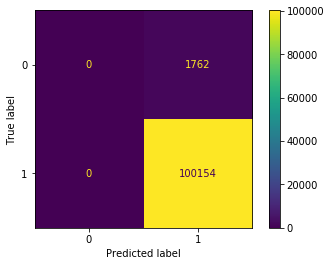

In [130]:
plot_confusion_matrix(logreg, X_test, y_test, values_format='.0f'); 

In [152]:
1762/ (1762+100154)

0.0172887475960595

In [154]:
100 - (1762/ (1762+100154) *100)

98.27112524039406

In [132]:
X_train.columns

Index(['term_ 60 months', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_other', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT',
       ...
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'age_oldest_line'],
      dtype='object', length=128)

In [133]:
coef = []
columns = []
for x,y  in zip(np.exp(logreg.coef_)[0], X_train.columns.values):
    coef.append(x)
    columns.append(y)
    

In [134]:
pd.DataFrame({'coef': coef, 'features': columns})

,coef,features
0,0.956843,term_ 60 months
1,1.047120,purpose_debt_consolidation
2,0.934484,purpose_home_improvement
3,0.899014,purpose_other
4,1.243575,addr_state_AL
...,...,...
123,0.985076,tot_hi_cred_lim
124,1.165903,total_bal_ex_mort
125,0.923718,total_bc_limit
126,0.847391,total_il_high_credit_limit


In [135]:
df_features = pd.DataFrame({'coef': coef, 'features': columns})

In [136]:
top20 = df_features.sort_values(by='coef', ascending=False).head(20)
top20

,coef,features
10,2.870170,addr_state_DC
43,1.767785,addr_state_SD
27,1.700404,addr_state_MS
32,1.479636,addr_state_NH
49,1.468015,addr_state_WA
50,1.432957,addr_state_WI
52,1.408226,addr_state_WY
14,1.357767,addr_state_HI
11,1.332382,addr_state_DE
70,1.324140,open_acc


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

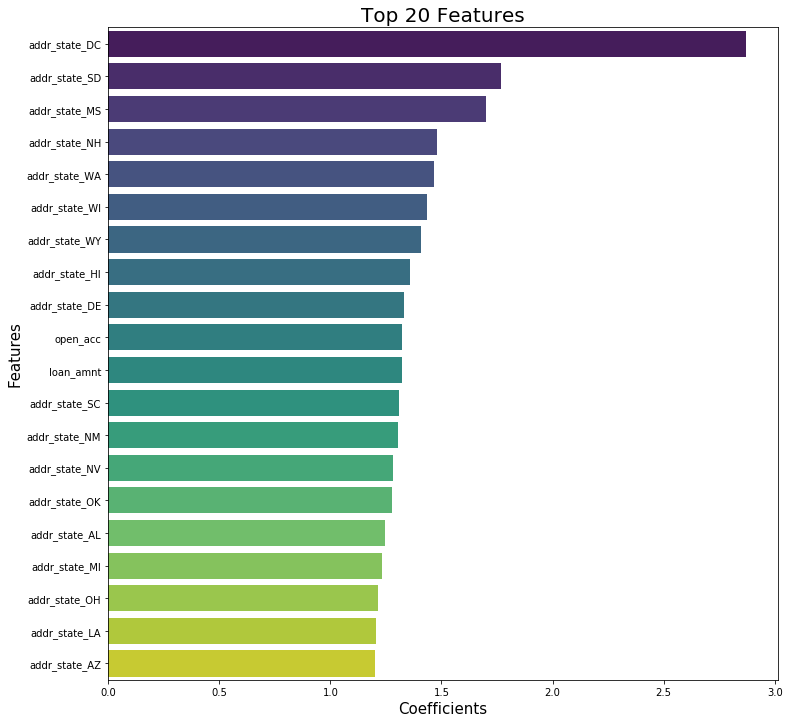

In [138]:
plt.figure(figsize=(12, 12))

sns.barplot(data=top20, x='coef', y='features', palette='viridis');

plt.xlabel('Coefficients', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Top 20 Features', fontsize=20)

plt.savefig('Top20Features_wStates')

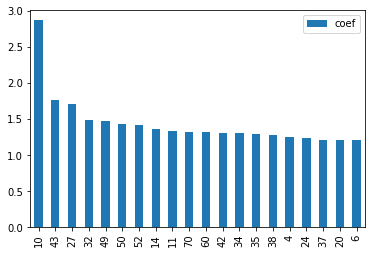

In [139]:
df_features.sort_values(by='coef', ascending=False).head(20).plot(kind='bar')

In [140]:
df_features.sort_values(by='coef', ascending=False).head(40)

# loan amnt is a numeric - so 1 standard deviation increase in loan_amnt increases the odds of being current by 32% 

# SD (dummified) - being from SD increses the chance of being current by 76%

,coef,features
10,2.870170,addr_state_DC
43,1.767785,addr_state_SD
27,1.700404,addr_state_MS
32,1.479636,addr_state_NH
49,1.468015,addr_state_WA
50,1.432957,addr_state_WI
52,1.408226,addr_state_WY
14,1.357767,addr_state_HI
11,1.332382,addr_state_DE
70,1.324140,open_acc


In [141]:
coef

[0.9568425560370467,
 1.0471199999528185,
 0.9344841794711963,
 0.8990144038359176,
 1.243575265941736,
 0.8331732034950774,
 1.2003593947669056,
 1.0832104331210943,
 0.9911034311744916,
 0.7918802474428791,
 2.8701702292033273,
 1.3323816595000137,
 1.1737672696124912,
 1.1010218320986669,
 1.3577668704573893,
 0.8828841616896592,
 1.066645188685108,
 0.8683302831141644,
 0.8297089354415169,
 1.1157032215149791,
 1.2042387811176247,
 0.9116577408797646,
 0.8093330905332047,
 0.692046173308904,
 1.2338824208976507,
 1.0156308971394912,
 0.8813586937075237,
 1.7004036085562961,
 1.0590029659099187,
 1.063695361381667,
 0.572976032013505,
 0.9482174756726274,
 1.4796363064033151,
 1.191104696860537,
 1.3022652625197484,
 1.2838494840790025,
 1.1613068035645318,
 1.2127902944369469,
 1.2780389965716548,
 1.03606969713152,
 1.0051441759107387,
 0.836384439108368,
 1.3078834092265306,
 1.76778457499398,
 1.1105740827574815,
 1.0495363003762288,
 0.8204667215655486,
 1.0425382888207173,
 1.

In [142]:
columns

['term_ 60 months',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_other',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY',
 'grade_B',
 'grade_

In [145]:
# Coef and variables
for x,y  in zip(np.exp(logreg.coef_)[0], X_train.columns.values):
    print(x,y)

0.9568425560370467 term_ 60 months
1.0471199999528185 purpose_debt_consolidation
0.9344841794711963 purpose_home_improvement
0.8990144038359176 purpose_other
1.243575265941736 addr_state_AL
0.8331732034950774 addr_state_AR
1.2003593947669056 addr_state_AZ
1.0832104331210943 addr_state_CA
0.9911034311744916 addr_state_CO
0.7918802474428791 addr_state_CT
2.8701702292033273 addr_state_DC
1.3323816595000137 addr_state_DE
1.1737672696124912 addr_state_FL
1.1010218320986669 addr_state_GA
1.3577668704573893 addr_state_HI
0.8828841616896592 addr_state_ID
1.066645188685108 addr_state_IL
0.8683302831141644 addr_state_IN
0.8297089354415169 addr_state_KS
1.1157032215149791 addr_state_KY
1.2042387811176247 addr_state_LA
0.9116577408797646 addr_state_MA
0.8093330905332047 addr_state_MD
0.692046173308904 addr_state_ME
1.2338824208976507 addr_state_MI
1.0156308971394912 addr_state_MN
0.8813586937075237 addr_state_MO
1.7004036085562961 addr_state_MS
1.0590029659099187 addr_state_MT
1.063695361381667 ad

In [146]:
X_train.columns.values

array(['term_ 60 months', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_other', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_ID', 'addr_state_IL',
       'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA',
       'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI',
       'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT',
       'addr_state_NC', 'addr_state_ND', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY',
       'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA',
       'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_state_TN',
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_sta